In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np
from getpass import getpass
import psycopg2
import pandas.io.sql as sqlio

In [2]:
accidents_by_cause2020  = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/accidents_by_cause2020edited.csv')

In [3]:
accidents_by_cause2020.dtypes

Case_Number                  object
District_Name                object
Neighborhood_Name            object
Street_Name                  object
Day_of_Week                  object
Year                          int64
Month_Number                  int64
Month_Name                   object
Day_of_Month                  int64
Hour_of_Day                   int64
Driver_Cause_Description     object
Shift_Description            object
Coordenada_UTM_X_ED50       float64
Coordenada_UTM_Y_ED50       float64
Longitud                    float64
Latitud                     float64
datetime                     object
dtype: object

In [4]:
accidents_by_cause2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Number,Month_Name,Day_of_Month,Hour_of_Day,Driver_Cause_Description,Shift_Description,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,datetime
0,2020S001281,Unknown,Unknown,Corts Catalanes,Wednesday,2020,2,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,2020-02-19 22:00:00
1,2020S002367,Unknown,Unknown,Molins de Rei,Saturday,2020,5,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,2020-05-30 12:00:00
2,2020S005723,Sant Martí,el Camp de l'Arpa del Clot,Independència,Wednesday,2020,12,December,2,13,Others,Morning,431461.53,4584551.41,2.179957,41.409589,2020-12-02 13:00:00
3,2020S000847,Sant Martí,el Camp de l'Arpa del Clot,Còrsega,Tuesday,2020,2,February,4,6,Lack of attention while driving,Morning,431597.10,4585085.49,2.181518,41.414411,2020-02-04 06:00:00
4,2020S003120,Sant Martí,el Camp de l'Arpa del Clot,Independència,Monday,2020,7,July,13,14,Disobeying traffic lights,Afternoon,431372.38,4585035.95,2.178835,41.413946,2020-07-13 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,2020S000959,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Saturday,2020,2,February,8,6,Improper or careless turn,Morning,431926.84,4586869.18,2.185263,41.430504,2020-02-08 06:00:00
6252,2020S000242,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Sunday,2020,1,January,12,20,Others,Afternoon,431514.05,4586864.21,2.180323,41.430424,2020-01-12 20:00:00
6253,2020S001025,Nou Barris,el Turó de la Peira,Cadí,Monday,2020,2,February,10,9,Lack of precaution when reversing,Morning,430607.68,4587157.78,2.169443,41.432991,2020-02-10 09:00:00
6254,2020S003737,Nou Barris,Porta,Pintor Alsamora,Wednesday,2020,8,August,19,19,Others,Afternoon,431781.49,4587486.66,2.183454,41.436053,2020-08-19 19:00:00


In [5]:
count = (accidents_by_cause2020['Case_Number'] == '2020S001281').sum()
print(f"Count: {count}")

Count: 1


In [6]:
rows = accidents_by_cause2020[accidents_by_cause2020['Case_Number'].str.contains('2020S001281', na=False)]
print(rows)

   Case_Number District_Name Neighborhood_Name      Street_Name Day_of_Week  \
0  2020S001281       Unknown           Unknown  Corts Catalanes   Wednesday   

   Year  Month_Number Month_Name  Day_of_Month  Hour_of_Day  \
0  2020             2   February            19           22   

    Driver_Cause_Description Shift_Description  Coordenada_UTM_X_ED50  \
0  Disobeying traffic lights             Night              432561.42   

   Coordenada_UTM_Y_ED50  Longitud    Latitud             datetime  
0             4584522.58  2.193119  41.409423  2020-02-19 22:00:00  


In [7]:
accidents_by_cause2020['Driver_Cause_Description'].unique()

array(['Disobeying traffic lights', 'Others',
       'Lack of attention while driving', 'Disobeying other signals',
       'Lack of precaution when reversing',
       'Lack of precaution entering traffic',
       'Improper/defective overtaking', 'Improper or careless turn',
       'Not respecting distances', 'Not respecting pedestrian crossings',
       'Not yielding to the right', 'Changing lanes without caution',
       'Entering the opposite lane', 'Mechanical failure or breakdown'],
      dtype=object)

In [8]:
print(accidents_by_cause2020['Case_Number'].duplicated().sum())

0


In [9]:
accidents_by_cause2020['Driver_Cause_Description'].value_counts()

Others                                 1433
Lack of attention while driving        1285
Not respecting distances                753
Improper or careless turn               576
Disobeying traffic lights               570
Changing lanes without caution          470
Disobeying other signals                380
Lack of precaution entering traffic     198
Not respecting pedestrian crossings     186
Lack of precaution when reversing       166
Improper/defective overtaking           148
Not yielding to the right                53
Entering the opposite lane               30
Mechanical failure or breakdown           8
Name: Driver_Cause_Description, dtype: int64

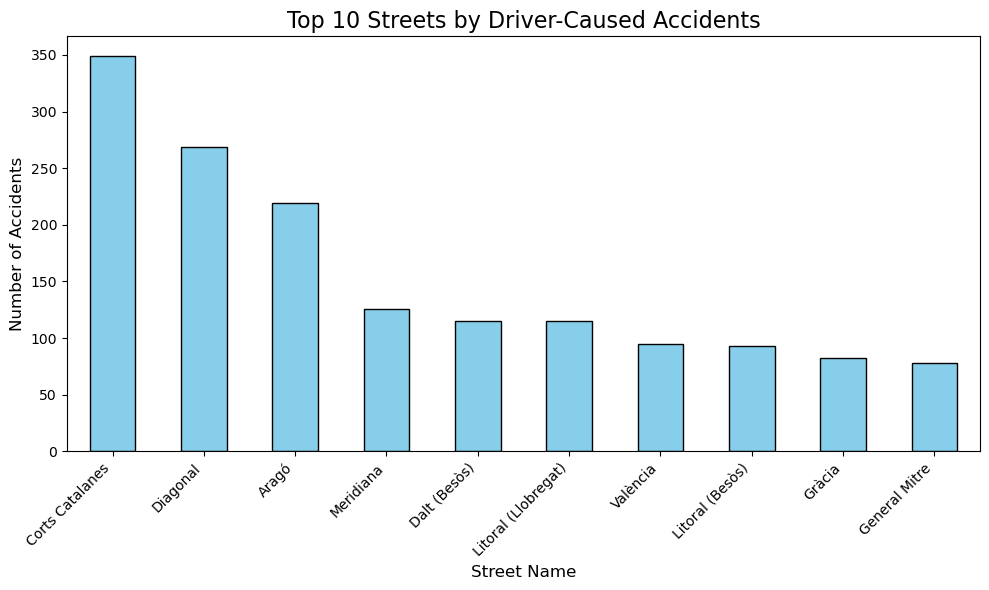

In [10]:
cause_by_street = accidents_by_cause2020.groupby(['Street_Name', 'Driver_Cause_Description']).size().reset_index(name='Counts')

# Summarizing the top 10 streets with the most accidents
top_streets = cause_by_street.groupby('Street_Name')['Counts'].sum().nlargest(10)

# Plotting the data
plt.figure(figsize=(10, 6))
top_streets.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Streets by Driver-Caused Accidents', fontsize=16)
plt.xlabel('Street Name', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

In [11]:
accidents_by_cause2020['Street_Name'].value_counts()

Corts Catalanes           349
Diagonal                  269
Aragó                     219
Meridiana                 126
Litoral (Llobregat)       115
                         ... 
Frederic Rahola             1
Moçambic                    1
Bretón de los Herreros      1
Guilleries                  1
Cadí                        1
Name: Street_Name, Length: 961, dtype: int64

In [12]:
les_corts_data = accidents_by_cause2020[
    (accidents_by_cause2020['Street_Name'] == 'Corts Catalanes') &
    (accidents_by_cause2020['Driver_Cause_Description'] != 'Others')
]
   
main_cause = les_corts_data['Driver_Cause_Description'].value_counts().idxmax()
main_cause_count = les_corts_data['Driver_Cause_Description'].value_counts().max()

main_cause_count

88

In [13]:
main_cause

'Not respecting distances'

In [14]:
top_5_causes = les_corts_data['Driver_Cause_Description'].value_counts().head(5)

In [15]:
top_5_causes

Not respecting distances           88
Lack of attention while driving    62
Changing lanes without caution     33
Disobeying traffic lights          28
Improper or careless turn          27
Name: Driver_Cause_Description, dtype: int64

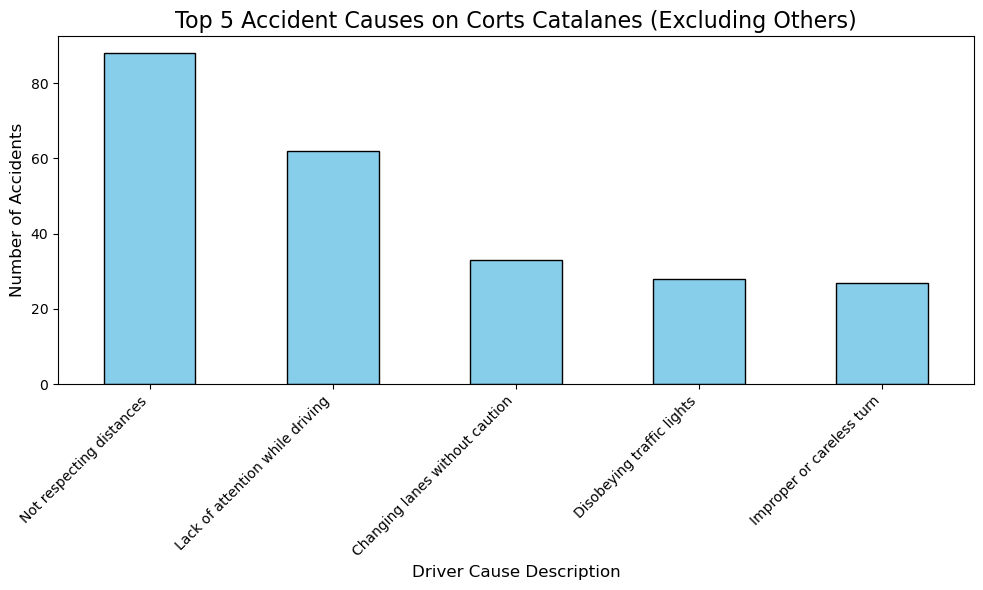

In [16]:
# Filter data for the specific street, excluding 'Others' in 'Driver_Cause_Description'
les_corts_data = accidents_by_cause2020[
    (accidents_by_cause2020['Street_Name'] == 'Corts Catalanes') &
    (accidents_by_cause2020['Driver_Cause_Description'] != 'Others')
]

# Get the top 5 most common causes
top_5_causes = les_corts_data['Driver_Cause_Description'].value_counts().head(5)

# Plot the data
plt.figure(figsize=(10, 6))
top_5_causes.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Top 5 Accident Causes on Corts Catalanes (Excluding Others)', fontsize=16)
plt.xlabel('Driver Cause Description', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

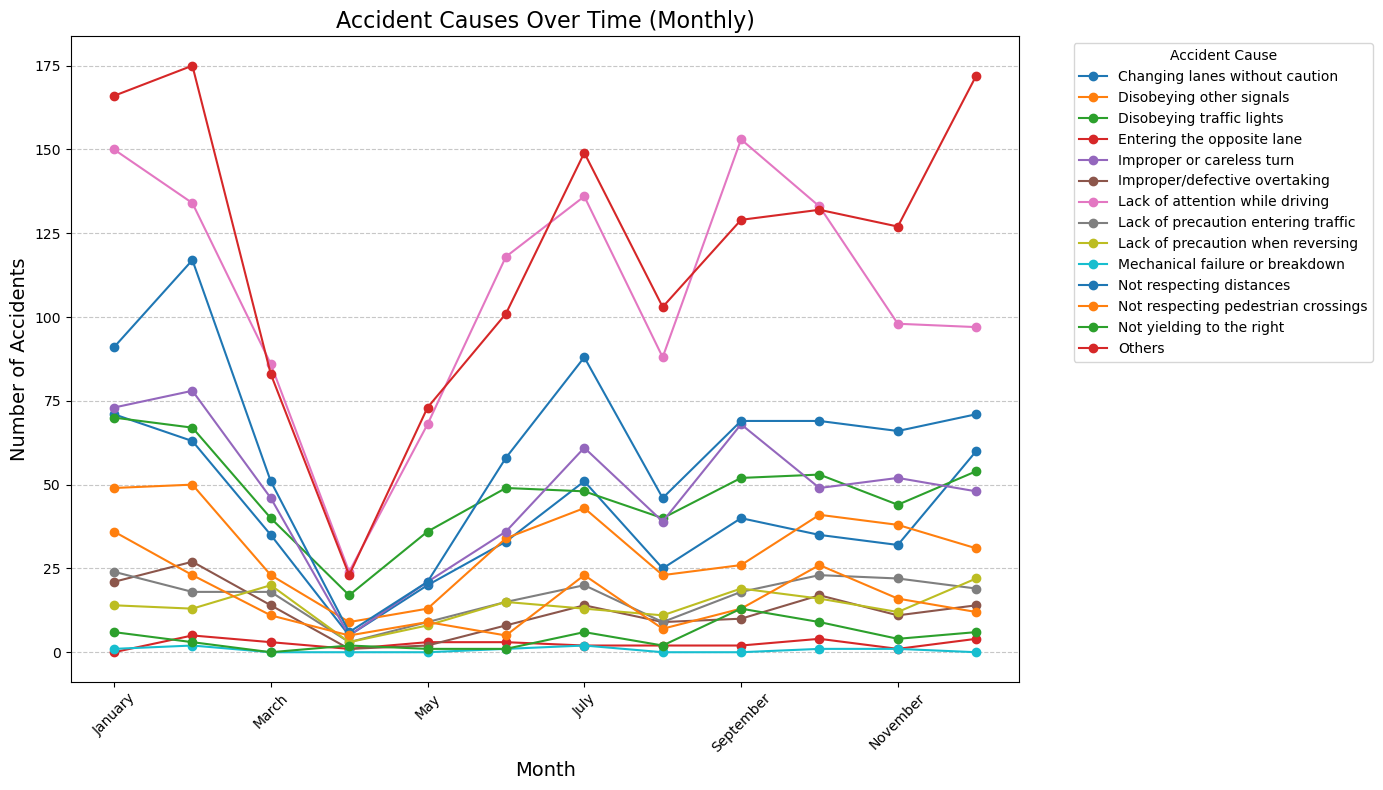

In [18]:
# Redefine the months_order and reorder the data
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame to follow the calendar order
accidents_over_time_by_month = accidents_over_time_by_month.reindex(months_order)

# Plot the data again
plt.figure(figsize=(14, 8))
accidents_over_time_by_month.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('Accident Causes Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Accident Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
# Find the most popular month based on the total number of accidents
most_popular_month = accidents_by_cause2020['Month_Name'].value_counts().idxmax()
most_popular_count = accidents_by_cause2020['Month_Name'].value_counts().max()

most_popular_month, most_popular_count

('February', 775)

In [25]:
# Create a map centered around Barcelona as a starting point
barcelona_center = [41.3851, 2.1734]  # Coordinates for Barcelona
accident_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points from February data to the map as child layers
february_data = accidents_by_cause2020[accidents_by_cause2020['Month_Name'] == 'February']

# Add accident points to the map with markers
for _, row in february_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(accident_map)

# Display the map in the notebook
accident_map

In [27]:
# Filter data for February and top 5 accident causes
february_top_causes_data = february_data[february_data['Driver_Cause_Description'].isin(top_5_causes)]

# Create a map centered around Barcelona
february_top_causes_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points for the top 5 causes in February to the map
for _, row in february_top_causes_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color=color_mapping[row['Driver_Cause_Description']],
        fill=True,
        fill_color=color_mapping[row['Driver_Cause_Description']],
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(february_top_causes_map)

# Add a legend to the map
february_top_causes_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
february_top_causes_map


In [29]:
# Create a map centered around Barcelona as a starting point
barcelona_center = [41.3851, 2.1734]  # Coordinates for Barcelona
accident_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points from April data to the map as child layers
april_data = accidents_by_cause2020[accidents_by_cause2020['Month_Name'] == 'April']

# Add accident points to the map with markers
for _, row in february_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(accident_map)

# Display the map in the notebook
accident_map

In [34]:
# Filter data for April and the top 5 accident causes
april_top_causes_data = april_data[april_data['Driver_Cause_Description'].isin(top_5_causes)]

# Create a map centered around Barcelona for April accidents
april_top_causes_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points for the top 5 causes in April to the map
for _, row in april_top_causes_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color=color_mapping[row['Driver_Cause_Description']],
        fill=True,
        fill_color=color_mapping[row['Driver_Cause_Description']],
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(april_top_causes_map)

# Add a legend to the map
april_top_causes_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
april_top_causes_map

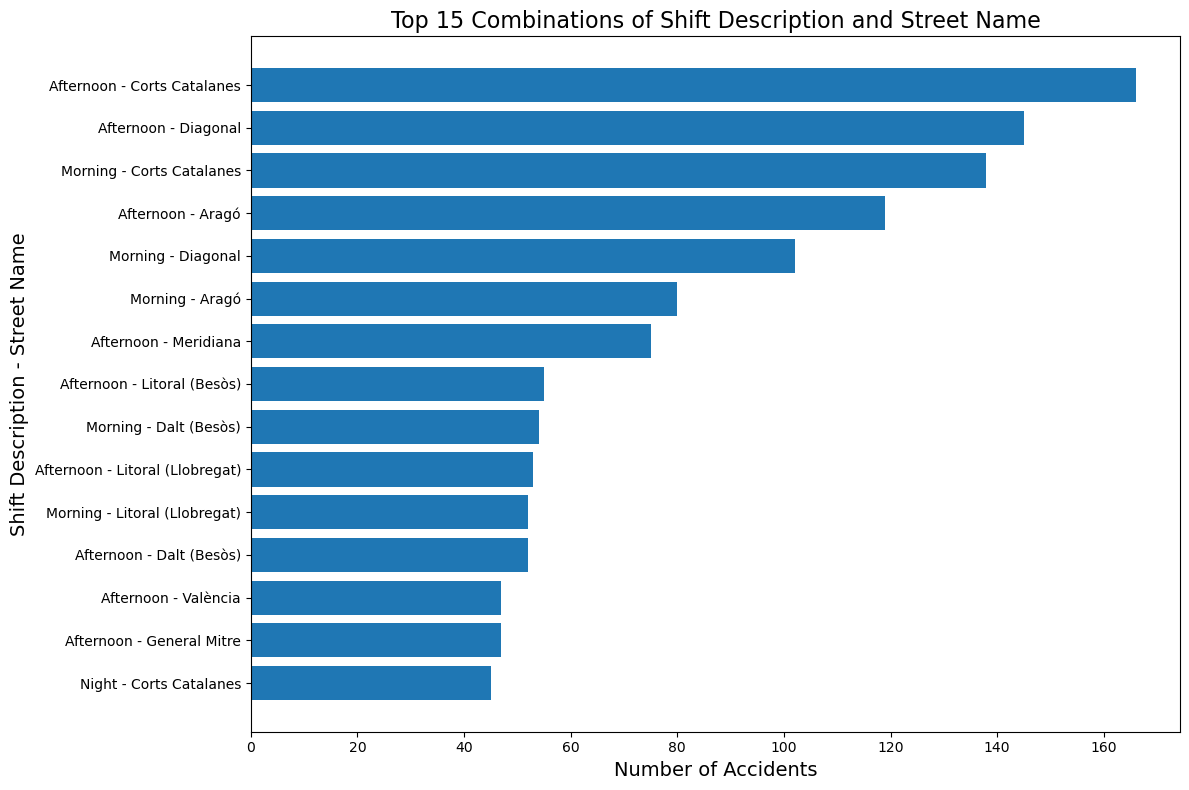

In [36]:
# Count occurrences of Shift_Description and Street_Name combinations
shift_street_counts = accidents_by_cause2020.groupby(['Shift_Description', 'Street_Name']).size().reset_index(name='Count')

# Sort the data to focus on the most frequent combinations
shift_street_counts = shift_street_counts.sort_values(by='Count', ascending=False).head(15)

# Plot a bar chart of the top 15 Shift_Description and Street_Name combinations
plt.figure(figsize=(12, 8))
plt.barh(
    shift_street_counts['Shift_Description'] + ' - ' + shift_street_counts['Street_Name'],
    shift_street_counts['Count']
)
plt.title('Top 15 Combinations of Shift Description and Street Name', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Shift Description - Street Name', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.tight_layout()
plt.show()


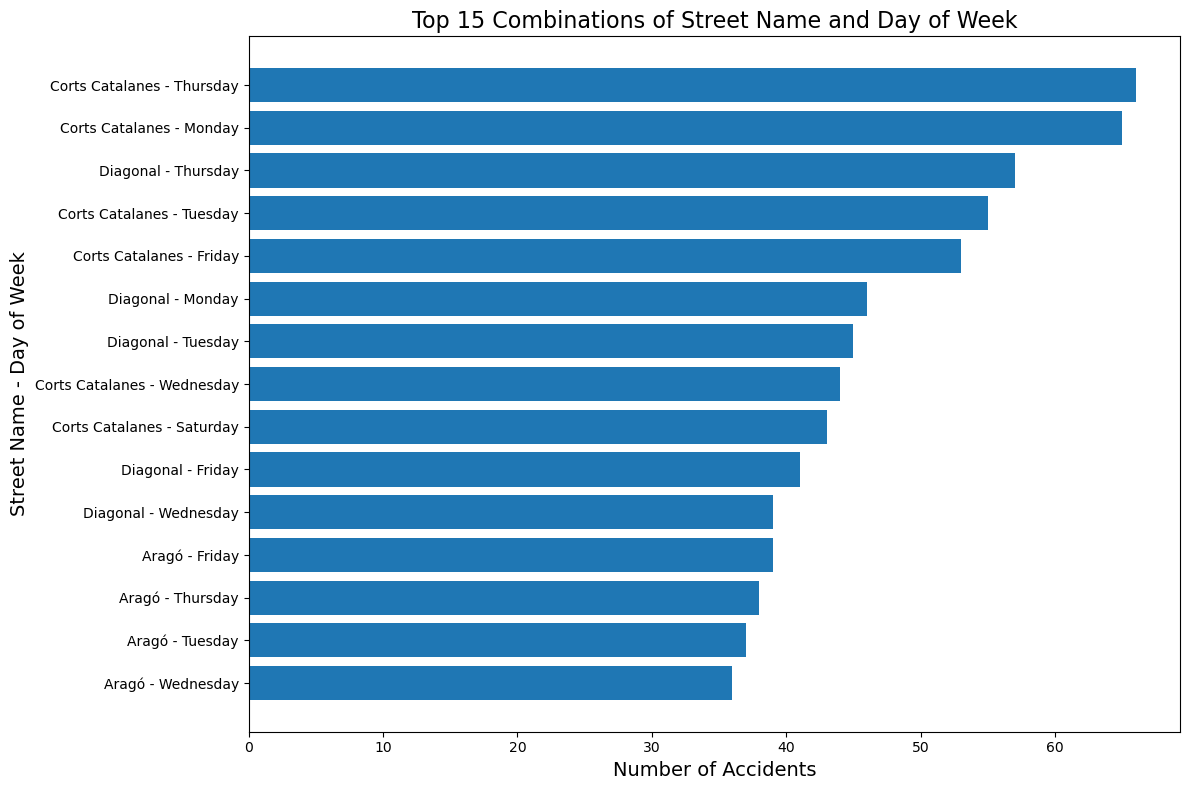

In [38]:
# Count occurrences of Street_Name and Day_of_Week combinations
street_day_counts = accidents_by_cause2020.groupby(['Street_Name', 'Day_of_Week']).size().reset_index(name='Count')

# Sort the data to focus on the most frequent combinations
street_day_counts = street_day_counts.sort_values(by='Count', ascending=False).head(15)

# Plot a bar chart of the top 15 Street_Name and Day_of_Week combinations
plt.figure(figsize=(12, 8))
plt.barh(
    street_day_counts['Street_Name'] + ' - ' + street_day_counts['Day_of_Week'],
    street_day_counts['Count']
)
plt.title('Top 15 Combinations of Street Name and Day of Week', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Street Name - Day of Week', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.tight_layout()
plt.show()


In [42]:
# Aggregate accident counts by latitude and longitude
dangerous_points = accidents_by_cause2020.groupby(['Latitud', 'Longitud']).size().reset_index(name='Count')

# Find the top 15 most dangerous points
top_15_dangerous_points = dangerous_points.nlargest(15, 'Count')

# Create a map centered on Barcelona
top_dangerous_points_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add markers for the top 15 most dangerous points
for _, row in top_15_dangerous_points.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"Count: {row['Count']}",
        icon=folium.Icon(color='red', icon='warning'),
    ).add_to(top_dangerous_points_map)

# Display the map
top_dangerous_points_map